# Fisher's Iris

In [1]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt

Text(0, 0.5, 'width')

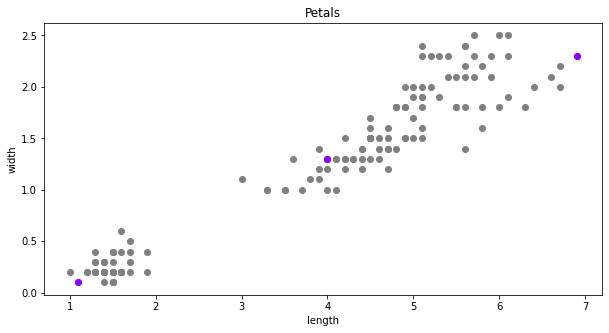

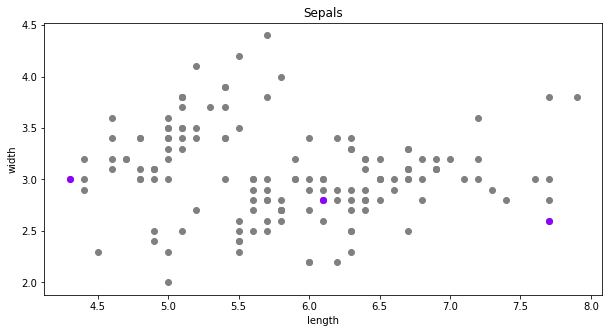

In [4]:
flwr_massive = np.loadtxt('IRIS.txt', skiprows=1, delimiter=',', usecols=(0,1,2,3))

# sepal_length, sepal_width, petal_length, petal_width, species 

# Manual realisation of К-means++ clusterization methods

def centroids_approach(number_of_clusters, np_data):
    # Choose random point in data array
    centroids = []
    centroids_index = []
    
    random_point_index = random.randint(0, len(np_data[:,0])-1)
    random_point = np_data[random_point_index]
    
    centroids.append(random_point)
    centroids_index.append(random_point_index)
    
    for j in range(1, number_of_clusters):
        # Seeking for the most remost point
        check = 0
        for i in range(0, len(np_data[:,0])):
            
            sum_dist = 0
            for t in centroids:
                dist = (t[0] - np_data[i, 0])**2 + (t[1] - np_data[i, 1])**2 + (t[2] - np_data[i, 2])**2 + (t[3] - np_data[i, 3])**2
                sum_dist += dist
            if sum_dist > check:
                check = sum_dist
                check_id = i
                
        centroids.append(np_data[check_id])
        centroids_index.append(check_id)
                
    return centroids, centroids_index        

x, y = centroids_approach(3, flwr_massive)  

# Scatter-plot for centroids and not-clustered data



plt.figure(figsize=(10,5))
plt.title('Petals')
plt.scatter(flwr_massive[:, 2], flwr_massive[:, 3], marker='o', c='#808080')
plt.scatter(x[0][2], x[0][3], marker='o', c='#8e00ff')
plt.scatter(x[1][2], x[1][3], marker='o', c='#8e00ff')
plt.scatter(x[2][2], x[2][3], marker='o', c='#8e00ff')
plt.xlabel('length')
plt.ylabel('width')

plt.figure(figsize=(10,5))
plt.title('Sepals')
plt.scatter(flwr_massive[:, 0], flwr_massive[:, 1], marker='o', c='#808080')
plt.scatter(x[0][0], x[0][1], marker='o', c='#8e00ff')
plt.scatter(x[1][0], x[1][1], marker='o', c='#8e00ff')
plt.scatter(x[2][0], x[2][1], marker='o', c='#8e00ff')
plt.xlabel('length')
plt.ylabel('width')



Text(0, 0.5, 'Error')

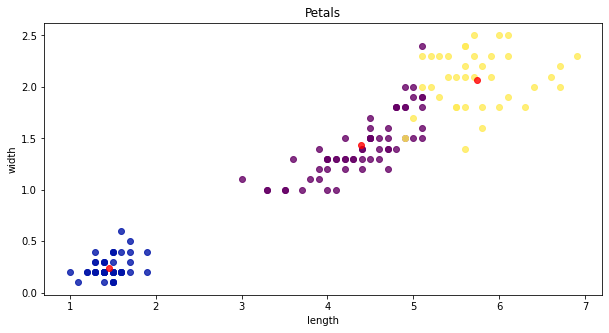

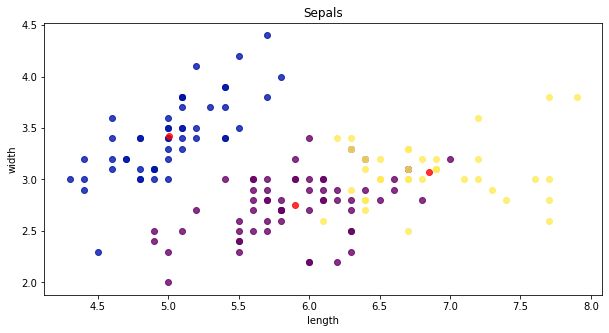

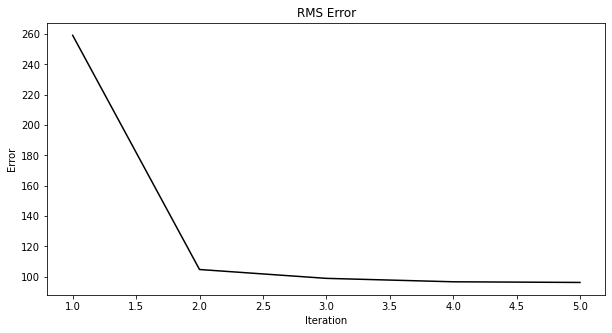

In [5]:
def kmeans_plus(np_data, centroids_index):
    # Initial centroids list and empty list for clusters
    iterations = 1
    iter_mas = []
    error_mas = []
    centroids = []
    clusters = []
    clusters_copy = [[0,],[],[]]
    parameter_clearer = 0
    for k in centroids_index:
        clusters.append([])
        centroids.append(np_data[k])
        
    goOn = True
    while goOn == True:
        
        if parameter_clearer == 1:
            clusters = [[],[],[]]
        
        
        # Sorting points to clusters 
        for i in range(0, len(np_data[:,0])):
            min_dist = math.inf
            cluster_id = 0
            for j in range(0, len(centroids_index)):
                dist = math.sqrt((centroids[j][0] - np_data[i, 0])**2 + (centroids[j][1] - np_data[i, 1])**2 + (centroids[j][2] - np_data[i, 2])**2 + (centroids[j][3] - np_data[i, 3])**2)
                if dist < min_dist:
                    min_dist = dist
                    cluster_id = j
            clusters[cluster_id].append(np_data[i]) 
        

        # RMS Calculation
        v_err = 0
        num_centroid = 0
        for cluster in clusters:
            for point in cluster:
                point_dist = (centroids[num_centroid][0] - point[0])**2 + (centroids[num_centroid][1] - point[1])**2 + (centroids[num_centroid][2] - point[2])**2 + (centroids[num_centroid][2] - point[2])**2
                v_err += point_dist
            
            num_centroid += 1
            
        iter_mas.append(iterations)
        error_mas.append(v_err)
    
        # Check for tranfer of point from one cluster to another
        if len(clusters[0]) == len(clusters_copy[0]) and len(clusters[1]) == len(clusters_copy[1]) and len(clusters[2]) == len(clusters_copy[2]):
            goOn = False
        
        
        centroids2 = centroids.copy()
        # Center of mass calculation
        centroids = []
        # Copy for points, if there are any migrants
        clusters_copy = clusters.copy()
        
        for cluster in clusters:
            # Summation of parametrs for calculation of mass center
            summ1, summ2, summ3, summ4 = 0, 0, 0, 0
            number = 0
            for point in cluster:
                number += 1
                summ1 += point[0]
                summ2 += point[1]
                summ3 += point[2]
                summ4 += point[3]
            middle_point = [summ1/number, summ2/number, summ3/number, summ4/number]
            centroids.append(middle_point)
        iterations += 1
        parameter_clearer = 1

    return iter_mas, error_mas, clusters, centroids
     
iterations, error, clusters, centroids = kmeans_plus(flwr_massive, y)

# Scatter-plot for centroids and CLUSTERED data

mega = [[[],[],[],[]], [[],[],[],[]], [[],[],[],[]]]
cn = 0
for cluster in clusters:
    for point in cluster:
        mega[cn][0].append(point[0])
        mega[cn][1].append(point[1])
        mega[cn][2].append(point[2])
        mega[cn][3].append(point[3]) 
    cn += 1   
    

plt.figure(figsize=(10,5))
plt.title('Petals')
plt.scatter(mega[0][2], mega[0][3], marker='o', c='#660066', alpha=0.8)
plt.scatter(mega[1][2], mega[1][3], marker='o', c='#0014a8', alpha=0.8)
plt.scatter(mega[2][2], mega[2][3], marker='o', c='#ffeb57', alpha=0.8)
plt.scatter(centroids[0][2], centroids[0][3], marker='o', c='#ff0000', alpha=0.8)
plt.scatter(centroids[1][2], centroids[1][3], marker='o', c='#ff0000', alpha=0.8)
plt.scatter(centroids[2][2], centroids[2][3], marker='o', c='#ff0000', alpha=0.8)
plt.xlabel('length')
plt.ylabel('width')

plt.figure(figsize=(10,5))
plt.title('Sepals')
plt.scatter(mega[0][0], mega[0][1], marker='o', c='#660066', alpha=0.8)
plt.scatter(mega[1][0], mega[1][1], marker='o', c='#0014a8', alpha=0.8)
plt.scatter(mega[2][0], mega[2][1], marker='o', c='#ffeb57', alpha=0.8)
plt.scatter(centroids[0][0], centroids[0][1], marker='o', c='#ff0000', alpha=0.8)
plt.scatter(centroids[1][0], centroids[1][1], marker='o', c='#ff0000', alpha=0.8)
plt.scatter(centroids[2][0], centroids[2][1], marker='o', c='#ff0000', alpha=0.8)
plt.xlabel('length')
plt.ylabel('width')


plt.figure(figsize=(10,5))
plt.plot(iterations, error, 'k', label='Data')
plt.title('RMS Error')
plt.xlabel('Iteration')
plt.ylabel('Error')


In [6]:
# Test for K-mean++ clusterization

import pandas as pd

data_file = pd.read_csv('IRIS.csv')

analysis = [{'Claster': 1, 'Setosa': 0, 'Versicolor': 0, 'Virginica': 0}, 
            {'Claster': 2, 'Setosa': 0, 'Versicolor': 0, 'Virginica': 0},
            {'Claster': 3, 'Setosa': 0, 'Versicolor': 0, 'Virginica': 0}]
nc = 0
for cluster in clusters:
    for point in cluster:
        for c in range(0, 150):
            if point[0] == data_file.values[c][0] and point[1] == data_file.values[c][1] and point[2] == data_file.values[c][2] and point[3] == data_file.values[c][3]:
                if data_file.values[c][4] == 'Iris-setosa':
                    analysis[nc]['Setosa'] = analysis[nc]['Setosa'] + 1
                if data_file.values[c][4] == 'Iris-versicolor':
                    analysis[nc]['Versicolor'] = analysis[nc]['Versicolor'] + 1
                if data_file.values[c][4] == 'Iris-virginica':    
                    analysis[nc]['Virginica'] = analysis[nc]['Virginica'] + 1
                    
                
    nc += 1          
     
        
print(analysis)

print(len(clusters[0]))
print(len(clusters[1]))
print(len(clusters[2]))
        


[{'Claster': 1, 'Setosa': 0, 'Versicolor': 48, 'Virginica': 16}, {'Claster': 2, 'Setosa': 56, 'Versicolor': 0, 'Virginica': 0}, {'Claster': 3, 'Setosa': 0, 'Versicolor': 2, 'Virginica': 36}]
62
50
38
